In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [ ]:
train_final = pd.read_csv("train_final.csv")
test_final = pd.read_csv("test_final.csv")

In [ ]:
def plot_numeric_features_vs_label(df, label_col, n_cols=3, max_features=20):
    # Sayısal sütunları seç
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if label_col in numeric_cols:
        numeric_cols.remove(label_col)

    # Sadece ilk max_features kadar feature
    numeric_cols = numeric_cols[:max_features]

    n_features = len(numeric_cols)
    n_rows = math.ceil(n_features / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()  # 2D array'ı düzleştir

    for i, col in enumerate(numeric_cols):
        sns.scatterplot(x=label_col, y=col, data=df, ax=axes[i])
        axes[i].set_title(f"{col} vs {label_col}")

    # Kalan subplotları boş bırak
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

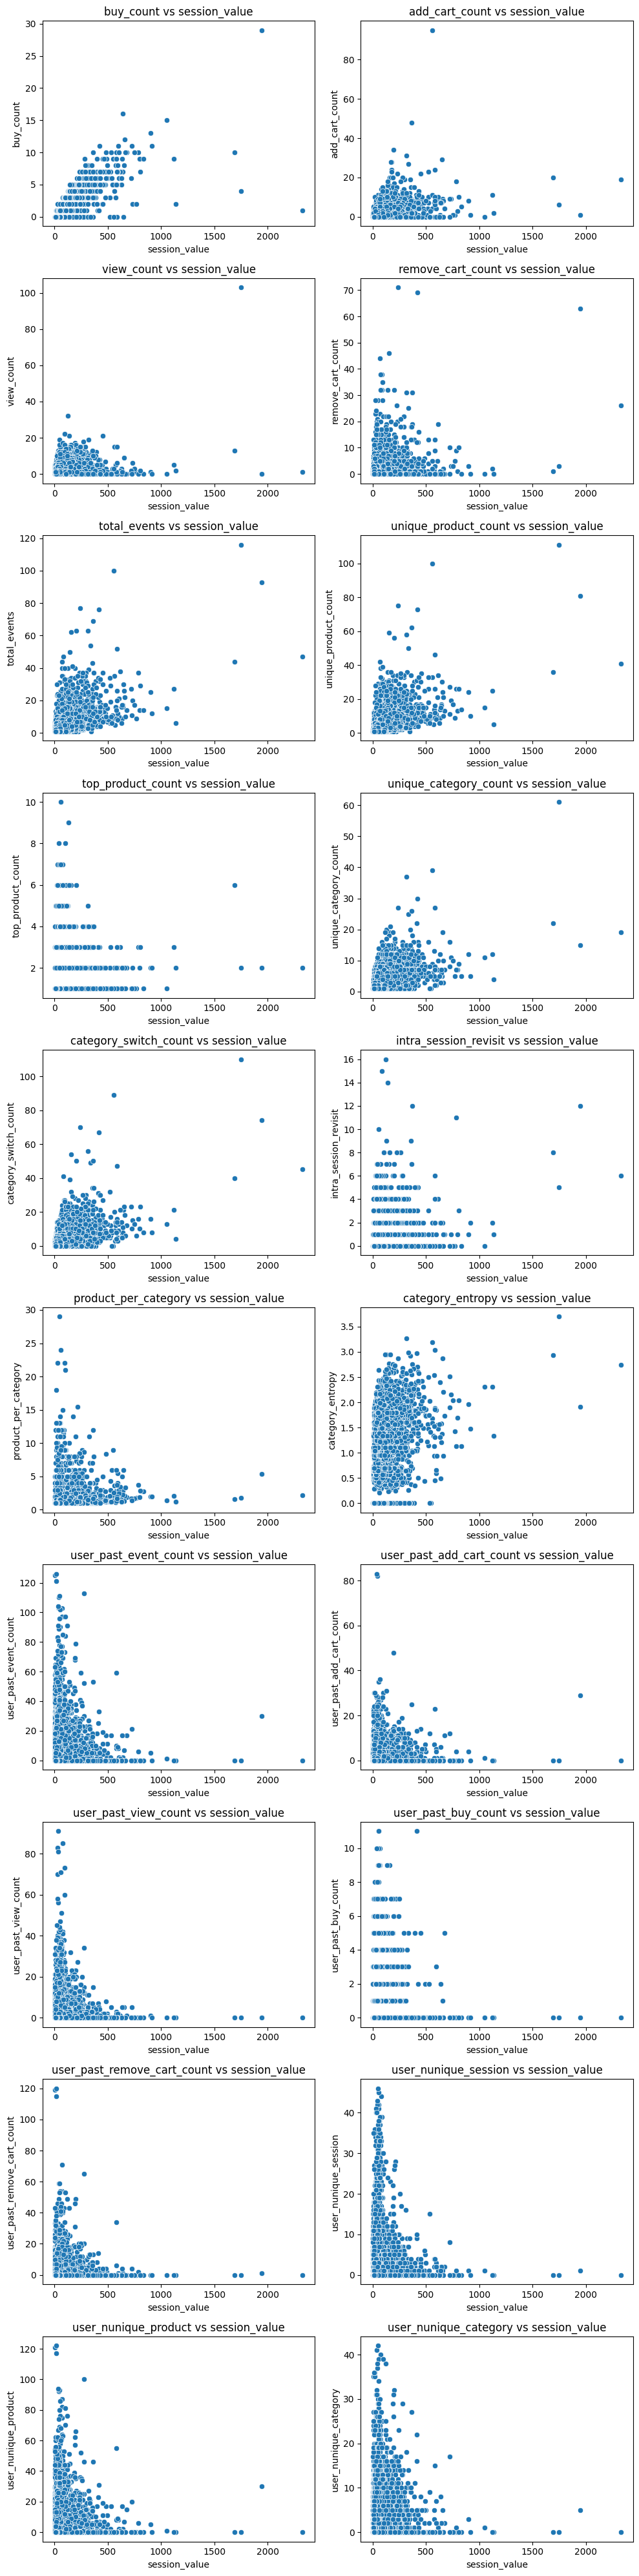

In [ ]:
plot_numeric_features_vs_label(train_final,"session_value",2)

In [ ]:
train_final.sort_values(by="min_date")["session_value"].plot(kind="hist")

In [ ]:
dupes = test[test.duplicated(keep=False)]

In [ ]:
dupes.sort_values("user_session").head(50)

In [ ]:
print("TRAIN MIN:",train["event_time"].min())
print("TRAIN MAX:",train["event_time"].max())
print("TEST MIN:",test["event_time"].min())
print("TEST MAX:",test["event_time"].max())

TRAIN MIN: 2025-06-01 00:00:24+00:00
TRAIN MAX: 2025-06-21 23:59:52+00:00
TEST MIN: 2025-06-22 00:01:00+00:00
TEST MAX: 2025-06-30 23:59:47+00:00


In [ ]:
print(train["event_type"].unique())

['ADD_CART' 'VIEW' 'REMOVE_CART' 'BUY']


In [ ]:
print(train.shape)
print(train.nunique())

(141219, 7)
event_time       128357
event_type            4
product_id        26470
category_id         448
user_id           51821
user_session      70736
session_value     12719
dtype: int64


In [ ]:
print(test.shape)
print(test.nunique())

(62951, 6)
event_time      56682
event_type          4
product_id      17450
category_id       433
user_id         22665
user_session    30789
dtype: int64


In [ ]:
print("Train-Test ortak user:", len(set(train["user_id"]) & set(test["user_id"])))
print("Train-Test ortak product:", len(set(train["product_id"]) & set(test["product_id"])))
print("Train-Test ortak session:", len(set(train["user_session"]) & set(test["user_session"])))

Train-Test ortak user: 4620
Train-Test ortak product: 14538
Train-Test ortak session: 210


In [ ]:
print(set(train["user_session"]) & set(test["user_session"]))

{'SESSION_005071', 'SESSION_184287', 'SESSION_053340', 'SESSION_138487', 'SESSION_181476', 'SESSION_130580', 'SESSION_038318', 'SESSION_112328', 'SESSION_076020', 'SESSION_051575', 'SESSION_060174', 'SESSION_120055', 'SESSION_067854', 'SESSION_023265', 'SESSION_179136', 'SESSION_158002', 'SESSION_025329', 'SESSION_032569', 'SESSION_175753', 'SESSION_135864', 'SESSION_152984', 'SESSION_014249', 'SESSION_053606', 'SESSION_154939', 'SESSION_105822', 'SESSION_074761', 'SESSION_090025', 'SESSION_160535', 'SESSION_115209', 'SESSION_085141', 'SESSION_056034', 'SESSION_030570', 'SESSION_175602', 'SESSION_055157', 'SESSION_005022', 'SESSION_083163', 'SESSION_138440', 'SESSION_033773', 'SESSION_124775', 'SESSION_024833', 'SESSION_162790', 'SESSION_157259', 'SESSION_014646', 'SESSION_018610', 'SESSION_114996', 'SESSION_131581', 'SESSION_026732', 'SESSION_018215', 'SESSION_109259', 'SESSION_098466', 'SESSION_051784', 'SESSION_098238', 'SESSION_023661', 'SESSION_155018', 'SESSION_164064', 'SESSION_

In [ ]:
train.head()

,event_time,event_type,product_id,category_id,user_id,user_session,session_value
0,2025-06-19 10:23:07+00:00,ADD_CART,PROD_011223,CAT_00054,USER_097562,SESSION_158779,90.29
1,2025-06-07 21:34:45+00:00,ADD_CART,PROD_005519,CAT_00144,USER_006535,SESSION_029987,16.39
2,2025-06-21 21:29:09+00:00,ADD_CART,PROD_000577,CAT_00273,USER_047199,SESSION_022134,64.27
3,2025-06-09 09:10:20+00:00,ADD_CART,PROD_019235,CAT_00442,USER_082028,SESSION_161308,41.67
4,2025-06-19 11:13:58+00:00,ADD_CART,PROD_001702,CAT_00025,USER_096574,SESSION_182859,86.11


In [ ]:
train[train["user_session"]=="SESSION_182859"]

,event_time,event_type,product_id,category_id,user_id,user_session,session_value
4,2025-06-19 11:13:58+00:00,ADD_CART,PROD_001702,CAT_00025,USER_096574,SESSION_182859,86.11
10903,2025-06-19 11:14:18+00:00,ADD_CART,PROD_001511,CAT_00025,USER_096574,SESSION_182859,86.11
128310,2025-06-19 11:23:34+00:00,BUY,PROD_001702,CAT_00025,USER_096574,SESSION_182859,86.11


In [ ]:
train[train["session_value"]==10.76]

,event_time,event_type,product_id,category_id,user_id,user_session,session_value
40878,2025-06-21 15:45:27+00:00,ADD_CART,PROD_001209,CAT_00271,USER_043676,SESSION_121130,10.76
51674,2025-06-02 02:43:41+00:00,VIEW,PROD_016185,CAT_00340,USER_057343,SESSION_117901,10.76
54043,2025-06-19 19:52:35+00:00,VIEW,PROD_025022,CAT_00011,USER_092361,SESSION_141078,10.76
60921,2025-06-02 17:04:35+00:00,VIEW,PROD_009760,CAT_00280,USER_061856,SESSION_035554,10.76
61132,2025-06-16 19:06:51+00:00,VIEW,PROD_028980,CAT_00150,USER_093912,SESSION_098751,10.76
66927,2025-06-19 14:15:28+00:00,VIEW,PROD_006550,CAT_00011,USER_005782,SESSION_154888,10.76
71552,2025-06-13 13:34:55+00:00,VIEW,PROD_021451,CAT_00114,USER_018714,SESSION_174304,10.76
80338,2025-06-07 01:25:12+00:00,VIEW,PROD_023445,CAT_00295,USER_075073,SESSION_052538,10.76
82197,2025-06-04 14:51:25+00:00,VIEW,PROD_014080,CAT_00424,USER_066187,SESSION_044497,10.76
85196,2025-06-16 19:07:06+00:00,VIEW,PROD_028980,CAT_00150,USER_093912,SESSION_098751,10.76


In [ ]:
test[test["user_session"]=="SESSION_000375"].sort_values("event_time")

,event_time,event_type,product_id,category_id,user_id,user_session
7824,2025-06-30 18:44:44+00:00,ADD_CART,PROD_016770,CAT_00046,USER_045748,SESSION_000375
36750,2025-06-30 18:52:03+00:00,VIEW,PROD_016765,CAT_00046,USER_045748,SESSION_000375
50323,2025-06-30 18:58:35+00:00,REMOVE_CART,PROD_016797,CAT_00046,USER_045748,SESSION_000375
50472,2025-06-30 18:58:35+00:00,REMOVE_CART,PROD_016797,CAT_00046,USER_045748,SESSION_000375
47498,2025-06-30 18:58:37+00:00,REMOVE_CART,PROD_016798,CAT_00046,USER_045748,SESSION_000375


In [ ]:
train[train["user_id"]=="USER_047199"].sort_values("event_time")

,event_time,event_type,product_id,category_id,user_id,user_session,session_value


In [ ]:
train.groupby(["user_id","category_id"]).ngroups

97514

In [ ]:
multi_sessions = train.groupby("user_session")["user_id"].nunique()
multi_sessions = multi_sessions[multi_sessions > 1]
multi_sessions

user_session
SESSION_000000    21
SESSION_020888     2
Name: user_id, dtype: int64

In [ ]:
multi_sessions = test.groupby("user_session")["user_id"].nunique()
multi_sessions = multi_sessions[multi_sessions > 1]
multi_sessions

user_session
SESSION_000000    17
SESSION_094821     2
Name: user_id, dtype: int64

In [ ]:
test[test["user_session"]=="SESSION_000000"]

,event_time,event_type,product_id,category_id,user_id,user_session
1699,2025-06-23 15:24:38+00:00,ADD_CART,PROD_013194,CAT_00281,USER_027389,SESSION_000000
4148,2025-06-28 17:05:24+00:00,ADD_CART,PROD_009345,CAT_00004,USER_110606,SESSION_000000
5665,2025-06-22 16:47:27+00:00,ADD_CART,PROD_021456,CAT_00113,USER_039670,SESSION_000000
5853,2025-06-25 20:16:57+00:00,ADD_CART,PROD_029085,CAT_00423,USER_106881,SESSION_000000
5922,2025-06-25 14:17:30+00:00,ADD_CART,PROD_004358,CAT_00019,USER_106471,SESSION_000000
6618,2025-06-30 07:17:02+00:00,ADD_CART,PROD_030954,CAT_00243,USER_112599,SESSION_000000
6857,2025-06-25 14:16:33+00:00,ADD_CART,PROD_006695,CAT_00019,USER_106471,SESSION_000000
8220,2025-06-25 06:42:40+00:00,ADD_CART,PROD_011325,CAT_00206,USER_105882,SESSION_000000
9376,2025-06-28 17:04:38+00:00,ADD_CART,PROD_006806,CAT_00013,USER_110606,SESSION_000000
11244,2025-06-25 06:04:40+00:00,ADD_CART,PROD_026574,CAT_00090,USER_105791,SESSION_000000


In [ ]:
test[test["user_id"]=="USER_047199"]

,event_time,event_type,product_id,category_id,user_id,user_session
10091,2025-06-22 17:02:14+00:00,ADD_CART,PROD_018889,CAT_00307,USER_047199,SESSION_149861
18280,2025-06-22 17:04:15+00:00,VIEW,PROD_002396,CAT_00257,USER_047199,SESSION_149861
33736,2025-06-22 09:37:54+00:00,VIEW,PROD_013865,CAT_00206,USER_047199,SESSION_100659
40172,2025-06-22 09:29:27+00:00,VIEW,PROD_023191,CAT_00168,USER_047199,SESSION_003311
44881,2025-06-22 07:41:14+00:00,REMOVE_CART,PROD_006895,CAT_00257,USER_047199,SESSION_130322
48594,2025-06-22 17:03:34+00:00,REMOVE_CART,PROD_031114,CAT_00206,USER_047199,SESSION_149861
48775,2025-06-22 17:00:50+00:00,REMOVE_CART,PROD_006476,CAT_00206,USER_047199,SESSION_149861
49186,2025-06-22 07:39:45+00:00,REMOVE_CART,PROD_018786,CAT_00369,USER_047199,SESSION_048447
50220,2025-06-22 17:02:39+00:00,REMOVE_CART,PROD_016909,CAT_00211,USER_047199,SESSION_149861
50301,2025-06-22 08:21:44+00:00,REMOVE_CART,PROD_026976,CAT_00171,USER_047199,SESSION_003311


In [ ]:
sample_submission.sort_values("user_session")

,user_session,session_value
1534,SESSION_000000,0.0
20390,SESSION_000013,0.0
4517,SESSION_000022,0.0
22499,SESSION_000024,0.0
5706,SESSION_000025,0.0
...,...,...
13871,SESSION_189737,0.0
2659,SESSION_189739,0.0
23055,SESSION_189744,0.0
11743,SESSION_189767,0.0
